<a href="https://colab.research.google.com/github/HoagondeAmedegnato/Banks-Historical-Stock-Price-Portfolio/blob/main/02_CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BANKS HISTORICAL STOCK PRICE**

Data Source: https://www.kaggle.com/tomasmantero/banks-historical-stock-price

***KPI: Help Investors Make Important Decisions And Predict New Trends***

author = Hoagonde Amedegnato

email = amereine69@gmail.com

# **CAPITAL ASSET PRICING MODEL (CAPM)**

- CAPM is a model that describes the relationship between the expected return and risk of securities
- CAPM indicated that the expected return on a security is equal to the risk-free return plus a risk premium
- CAPM assumes that there exist a risk-free asset with zero standard deviation
- Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market
- Beta is used in the CAPM and describes the relationship between systematic risk and expected return of assets


In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# *Load and Read Data*

In [3]:
BAC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/BAC (2).csv')
BAC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
1,2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2,2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
3,2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
4,2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806
...,...,...,...,...,...,...,...
3744,2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,27.580000
3745,2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,27.549999
3746,2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.980000
3747,2020-11-19,27.010000,26.650000,26.930000,26.980000,46423000.0,26.980000


In [4]:
C = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/C.csv')
C

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,379.511047
1,2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,372.504486
2,2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,374.352448
3,2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,374.352448
4,2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,372.581421
...,...,...,...,...,...,...,...
3744,2020-11-16,51.020000,49.860001,50.410000,50.400002,26699400.0,50.400002
3745,2020-11-17,50.930000,49.480000,49.840000,50.730000,18970000.0,50.730000
3746,2020-11-18,52.650002,51.009998,51.090000,51.049999,25824000.0,51.049999
3747,2020-11-19,52.320000,50.950001,51.599998,52.139999,20262400.0,52.139999


In [5]:
GS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/GS.csv')
GS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,106.263367
1,2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,104.795609
2,2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,104.754387
3,2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,106.238571
4,2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,107.516731
...,...,...,...,...,...,...,...
3744,2020-11-16,224.600006,220.029999,223.529999,222.380005,3004700.0,222.380005
3745,2020-11-17,224.850006,218.330002,220.020004,224.649994,2722900.0,224.649994
3746,2020-11-18,227.720001,223.509995,225.000000,224.300003,2856200.0,224.300003
3747,2020-11-19,224.940002,222.110001,224.300003,224.570007,1505200.0,224.570007


In [6]:
JPM = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/JPM.csv')
JPM

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.013376
1,2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.857462
2,2006-01-05,39.810001,39.500000,39.610001,39.740002,8109400.0,26.938803
3,2006-01-06,40.240002,39.549999,39.919998,40.020000,7966900.0,27.128614
4,2006-01-09,40.720001,39.880001,39.880001,40.669998,16575200.0,27.569229
...,...,...,...,...,...,...,...
3744,2020-11-16,118.610001,115.730003,117.790001,117.300003,19858600.0,117.300003
3745,2020-11-17,116.440002,114.580002,115.389999,116.110001,14553200.0,116.110001
3746,2020-11-18,118.610001,115.199997,117.339996,115.250000,12571200.0,115.250000
3747,2020-11-19,115.820000,113.559998,114.180000,115.559998,10202500.0,115.559998


In [7]:
MS = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/MS.csv')
MS

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.867344
1,2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.892612
2,2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.993786
3,2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.031731
4,2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.423725
...,...,...,...,...,...,...,...
3744,2020-11-16,58.139999,57.029999,57.759998,58.110001,12201400.0,58.110001
3745,2020-11-17,58.889999,57.200001,57.509998,58.810001,9599100.0,58.810001
3746,2020-11-18,60.130001,58.770000,59.000000,58.810001,11536700.0,58.810001
3747,2020-11-19,58.689999,57.860001,58.560001,58.630001,7220200.0,58.630001


In [8]:
WFC = pd.read_csv('/content/drive/MyDrive/Banks Stock Price/WFC (1).csv')
WFC

,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-01-03,31.975000,31.195000,31.600000,31.900000,11016400.0,20.723480
1,2006-01-04,31.820000,31.365000,31.799999,31.530001,10870000.0,20.483118
2,2006-01-05,31.555000,31.309999,31.500000,31.495001,10158000.0,20.460379
3,2006-01-06,31.775000,31.385000,31.580000,31.680000,8403800.0,20.580564
4,2006-01-09,31.825001,31.555000,31.674999,31.674999,5619600.0,20.577309
...,...,...,...,...,...,...,...
3744,2020-11-16,25.030001,24.389999,24.990000,24.900000,36954800.0,24.900000
3745,2020-11-17,25.150000,24.520000,24.530001,25.040001,29490400.0,25.040001
3746,2020-11-18,25.950001,25.059999,25.150000,25.059999,44318300.0,25.059999
3747,2020-11-19,26.219999,24.969999,25.190001,26.160000,44560000.0,26.160000


In [9]:
# Let's create a list for all banks stocks 
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
# Let's use pd.concat to concatenate all these bank stocks together into a single dataframe
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers)
bank_stocks

BAC                        ...        WFC                       
            Date       High        Low  ...      Close      Volume  Adj Close
0     2006-01-03  47.180000  46.150002  ...  31.900000  11016400.0  20.723480
1     2006-01-04  47.240002  46.450001  ...  31.530001  10870000.0  20.483118
2     2006-01-05  46.830002  46.320000  ...  31.495001  10158000.0  20.460379
3     2006-01-06  46.910000  46.349998  ...  31.680000   8403800.0  20.580564
4     2006-01-09  46.970001  46.360001  ...  31.674999   5619600.0  20.577309
...          ...        ...        ...  ...        ...         ...        ...
3744  2020-11-16  28.000000  27.180000  ...  24.900000  36954800.0  24.900000
3745  2020-11-17  27.600000  27.010000  ...  25.040001  29490400.0  25.040001
3746  2020-11-18  27.930000  26.959999  ...  25.059999  44318300.0  25.059999
3747  2020-11-19  27.010000  26.650000  ...  26.160000  44560000.0  26.160000
3748  2020-11-20  26.950001  26.629999  ...  25.480000  38425200.0  25.480000

[3749 rows x 42 columns]

# *Create Bank Stocks Price (Close) DataFrame*

In [11]:
BAC = bank_stocks['BAC', 'Close']
BAC

0       47.080002
1       46.580002
2       46.639999
3       46.570000
4       46.599998
          ...    
3744    27.580000
3745    27.549999
3746    26.980000
3747    26.980000
3748    26.809999
Name: (BAC, Close), Length: 3749, dtype: float64

In [12]:
C = bank_stocks['C', 'Close']
C

0       492.899994
1       483.799988
2       486.200012
3       486.200012
4       483.899994
           ...    
3744     50.400002
3745     50.730000
3746     51.049999
3747     52.139999
3748     51.650002
Name: (C, Close), Length: 3749, dtype: float64

In [13]:
GS = bank_stocks['GS', 'Close']
GS

0       128.869995
1       127.089996
2       127.040001
3       128.839996
4       130.389999
           ...    
3744    222.380005
3745    224.649994
3746    224.300003
3747    224.570007
3748    223.350006
Name: (GS, Close), Length: 3749, dtype: float64

In [14]:
JPM = bank_stocks['JPM', 'Close']
JPM

0        40.189999
1        39.619999
2        39.740002
3        40.020000
4        40.669998
           ...    
3744    117.300003
3745    116.110001
3746    115.250000
3747    115.559998
3748    114.570000
Name: (JPM, Close), Length: 3749, dtype: float64

In [15]:
MS = bank_stocks['MS', 'Close']
MS

0       58.310001
1       58.349998
2       58.509998
3       58.570000
4       59.189999
          ...    
3744    58.110001
3745    58.810001
3746    58.810001
3747    58.630001
3748    57.810001
Name: (MS, Close), Length: 3749, dtype: float64

In [16]:
WFC = bank_stocks['WFC', 'Close']
WFC

0       31.900000
1       31.530001
2       31.495001
3       31.680000
4       31.674999
          ...    
3744    24.900000
3745    25.040001
3746    25.059999
3747    26.160000
3748    25.480000
Name: (WFC, Close), Length: 3749, dtype: float64

In [17]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['C', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (C, Date), Length: 3749, dtype: object

In [18]:
# Let's create a list for all banks stocks Price using close column
tickers_close = ['DATE', 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [19]:
# Let's use pd.concat to concatenate all these bank stocks close column together into a single dataframe
bank_stocks_close = pd.concat([DATE, BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers_close)
bank_stocks_close

,DATE,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
1,2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2,2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
3,2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
4,2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999
...,...,...,...,...,...,...,...
3744,2020-11-16,27.580000,50.400002,222.380005,117.300003,58.110001,24.900000
3745,2020-11-17,27.549999,50.730000,224.649994,116.110001,58.810001,25.040001
3746,2020-11-18,26.980000,51.049999,224.300003,115.250000,58.810001,25.059999
3747,2020-11-19,26.980000,52.139999,224.570007,115.559998,58.630001,26.160000


# *Calculate The Return Of Each Bank On The Stocks Close*

In [20]:
df = bank_stocks['BAC', 'Close']
df

0       47.080002
1       46.580002
2       46.639999
3       46.570000
4       46.599998
          ...    
3744    27.580000
3745    27.549999
3746    26.980000
3747    26.980000
3748    26.809999
Name: (BAC, Close), Length: 3749, dtype: float64

In [21]:
BAC_daily_return = df.copy()

for j in range(1, len(df)):
  BAC_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  BAC_daily_return[0] = 0

In [22]:
BAC_daily_return

0       0.000000
1      -0.010620
2       0.001288
3      -0.001501
4       0.000644
          ...   
3744    0.021481
3745   -0.001088
3746   -0.020690
3747    0.000000
3748   -0.006301
Name: (BAC, Close), Length: 3749, dtype: float64

In [23]:
df = bank_stocks['C', 'Close']
df

0       492.899994
1       483.799988
2       486.200012
3       486.200012
4       483.899994
           ...    
3744     50.400002
3745     50.730000
3746     51.049999
3747     52.139999
3748     51.650002
Name: (C, Close), Length: 3749, dtype: float64

In [24]:
C_daily_return = df.copy()

for j in range(1, len(df)):
  C_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  C_daily_return[0] = 0

In [25]:
C_daily_return

0       0.000000
1      -0.018462
2       0.004961
3       0.000000
4      -0.004731
          ...   
3744    0.035758
3745    0.006548
3746    0.006308
3747    0.021352
3748   -0.009398
Name: (C, Close), Length: 3749, dtype: float64

In [26]:
df = bank_stocks['GS', 'Close']
df

0       128.869995
1       127.089996
2       127.040001
3       128.839996
4       130.389999
           ...    
3744    222.380005
3745    224.649994
3746    224.300003
3747    224.570007
3748    223.350006
Name: (GS, Close), Length: 3749, dtype: float64

In [27]:
GS_daily_return = df.copy()

for j in range(1, len(df)):
  GS_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  GS_daily_return[0] = 0

In [28]:
GS_daily_return

0       0.000000
1      -0.013812
2      -0.000393
3       0.014169
4       0.012030
          ...   
3744    0.015063
3745    0.010208
3746   -0.001558
3747    0.001204
3748   -0.005433
Name: (GS, Close), Length: 3749, dtype: float64

In [29]:
df = bank_stocks['JPM', 'Close']
df

0        40.189999
1        39.619999
2        39.740002
3        40.020000
4        40.669998
           ...    
3744    117.300003
3745    116.110001
3746    115.250000
3747    115.559998
3748    114.570000
Name: (JPM, Close), Length: 3749, dtype: float64

In [30]:
JPM_daily_return = df.copy()

for j in range(1, len(df)):
  JPM_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  JPM_daily_return[0] = 0

In [31]:
JPM_daily_return

0       0.000000
1      -0.014183
2       0.003029
3       0.007046
4       0.016242
          ...   
3744    0.028226
3745   -0.010145
3746   -0.007407
3747    0.002690
3748   -0.008567
Name: (JPM, Close), Length: 3749, dtype: float64

In [32]:
df = bank_stocks['MS', 'Close']
df

0       58.310001
1       58.349998
2       58.509998
3       58.570000
4       59.189999
          ...    
3744    58.110001
3745    58.810001
3746    58.810001
3747    58.630001
3748    57.810001
Name: (MS, Close), Length: 3749, dtype: float64

In [33]:
MS_daily_return = df.copy()

for j in range(1, len(df)):
  MS_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  MS_daily_return[0] = 0

In [34]:
MS_daily_return

0       0.000000
1       0.000686
2       0.002742
3       0.001025
4       0.010586
          ...   
3744    0.026497
3745    0.012046
3746    0.000000
3747   -0.003061
3748   -0.013986
Name: (MS, Close), Length: 3749, dtype: float64

In [35]:
df = bank_stocks['WFC', 'Close']
df

0       31.900000
1       31.530001
2       31.495001
3       31.680000
4       31.674999
          ...    
3744    24.900000
3745    25.040001
3746    25.059999
3747    26.160000
3748    25.480000
Name: (WFC, Close), Length: 3749, dtype: float64

In [36]:
WFC_daily_return = df.copy()

for j in range(1, len(df)):
  WFC_daily_return[j] = (df[j]-df[j-1])/df[j-1]

  WFC_daily_return[0] = 0

In [37]:
WFC_daily_return

0       0.000000
1      -0.011599
2      -0.001110
3       0.005874
4      -0.000158
          ...   
3744    0.034483
3745    0.005623
3746    0.000799
3747    0.043895
3748   -0.025994
Name: (WFC, Close), Length: 3749, dtype: float64

In [38]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['WFC', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (WFC, Date), Length: 3749, dtype: object

In [39]:
# Let's create a list for all banks stocks return
Tickers = ['DATE', 'BAC_daily_return', 'C_daily_return', 'GS_daily_return', 'JPM_daily_return', 'MS_daily_return', 'WFC_daily_return']

In [40]:
# Let's use pd.concat to concatenate all these banks stocks return dataframes together to a single dataframe
bank_stocks_return = pd.concat([DATE, BAC_daily_return, C_daily_return, GS_daily_return, JPM_daily_return, MS_daily_return, WFC_daily_return], axis = 1, keys = Tickers)
bank_stocks_return

,DATE,BAC_daily_return,C_daily_return,GS_daily_return,JPM_daily_return,MS_daily_return,WFC_daily_return
0,2006-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...,...
3744,2020-11-16,0.021481,0.035758,0.015063,0.028226,0.026497,0.034483
3745,2020-11-17,-0.001088,0.006548,0.010208,-0.010145,0.012046,0.005623
3746,2020-11-18,-0.020690,0.006308,-0.001558,-0.007407,0.000000,0.000799
3747,2020-11-19,0.000000,0.021352,0.001204,0.002690,-0.003061,0.043895


# *Create Bank Stocks Volume DataFrame*

In [41]:
BAC = bank_stocks['BAC', 'Volume']
BAC

0       16296700.0
1       17757900.0
2       14970700.0
3       12599800.0
4       15619400.0
           ...    
3744    57396700.0
3745    46402300.0
3746    54416700.0
3747    46423000.0
3748    40513900.0
Name: (BAC, Volume), Length: 3749, dtype: float64

In [42]:
C = bank_stocks['C', 'Volume']
C

0        1537600.0
1        1870900.0
2        1143100.0
3        1370200.0
4        1680700.0
           ...    
3744    26699400.0
3745    18970000.0
3746    25824000.0
3747    20262400.0
3748    15471100.0
Name: (C, Volume), Length: 3749, dtype: float64

In [43]:
GS = bank_stocks['GS', 'Volume']
GS

0       6188700.0
1       4861600.0
2       3717400.0
3       4319600.0
4       4723500.0
          ...    
3744    3004700.0
3745    2722900.0
3746    2856200.0
3747    1505200.0
3748    1848100.0
Name: (GS, Volume), Length: 3749, dtype: float64

In [44]:
JPM = bank_stocks['JPM', 'Volume']
JPM

0       12838600.0
1       13491500.0
2        8109400.0
3        7966900.0
4       16575200.0
           ...    
3744    19858600.0
3745    14553200.0
3746    12571200.0
3747    10202500.0
3748    12718900.0
Name: (JPM, Volume), Length: 3749, dtype: float64

In [45]:
MS = bank_stocks['MS', 'Volume']
MS

0        5377000.0
1        7977800.0
2        5778000.0
3        6889800.0
4        4144500.0
           ...    
3744    12201400.0
3745     9599100.0
3746    11536700.0
3747     7220200.0
3748     7739900.0
Name: (MS, Volume), Length: 3749, dtype: float64

In [46]:
WFC = bank_stocks['WFC', 'Volume']
WFC

0       11016400.0
1       10870000.0
2       10158000.0
3        8403800.0
4        5619600.0
           ...    
3744    36954800.0
3745    29490400.0
3746    44318300.0
3747    44560000.0
3748    38425200.0
Name: (WFC, Volume), Length: 3749, dtype: float64

In [47]:
# Since all banks have the same Date, let's select the date column to concatenate 
DATE = bank_stocks['GS', 'Date']
DATE

0       2006-01-03
1       2006-01-04
2       2006-01-05
3       2006-01-06
4       2006-01-09
           ...    
3744    2020-11-16
3745    2020-11-17
3746    2020-11-18
3747    2020-11-19
3748    2020-11-20
Name: (GS, Date), Length: 3749, dtype: object

In [48]:
# Let's create a list for all banks stocks using volume column
tickers_volume = ['DATE', 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [49]:
# Let's use pd.concat to concatenate all these bank stocks volume column together into a single dataframe
bank_stocks_volume = pd.concat([DATE, BAC, C, GS, JPM, MS, WFC], axis = 1, keys = tickers_volume)
bank_stocks_volume

,DATE,BAC,C,GS,JPM,MS,WFC
0,2006-01-03,16296700.0,1537600.0,6188700.0,12838600.0,5377000.0,11016400.0
1,2006-01-04,17757900.0,1870900.0,4861600.0,13491500.0,7977800.0,10870000.0
2,2006-01-05,14970700.0,1143100.0,3717400.0,8109400.0,5778000.0,10158000.0
3,2006-01-06,12599800.0,1370200.0,4319600.0,7966900.0,6889800.0,8403800.0
4,2006-01-09,15619400.0,1680700.0,4723500.0,16575200.0,4144500.0,5619600.0
...,...,...,...,...,...,...,...
3744,2020-11-16,57396700.0,26699400.0,3004700.0,19858600.0,12201400.0,36954800.0
3745,2020-11-17,46402300.0,18970000.0,2722900.0,14553200.0,9599100.0,29490400.0
3746,2020-11-18,54416700.0,25824000.0,2856200.0,12571200.0,11536700.0,44318300.0
3747,2020-11-19,46423000.0,20262400.0,1505200.0,10202500.0,7220200.0,44560000.0


# *Visualize Stocks Data Price (Close) and Stocks Data Volume*

In [50]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [51]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['DATE'], y = df[i], name = i)
  fig.show()

In [52]:
# Plot interactive chart
interactive_plot(bank_stocks_close, 'Bank Stock Prices (Close)')

Answer to question 2: CitiGroup (C) has the hightest price of 564.1 on December 2006

In [53]:
# Plot normalized interactive chart
interactive_plot(normalize(bank_stocks_close), 'Normalized Bank Stock Prices (Close)')

Using Normalized Bank Stock Prices, JPMorgan Chase has the hightest price with 3.510575 on January 2020

In [54]:
# plot interactive chart for Bank Stocks Volume data
interactive_plot(bank_stocks_volume, 'Bank Stocks Volume')

Without the normalization of the Stock Volume, Bank Of America has the most data volume with 1.226791B on December 2009

In [55]:
# plot the normalized interactive chart for Bank Stocks Volume data
interactive_plot(normalize(bank_stocks_volume), 'Normalized Bank Stocks Volume')

Using Normalized Bank Stock Volume, CitiGroup has the most data volume with 245.3589 on December 2009

# *Calculate Beta For A Single Stock*

In [56]:
# Let's recall for example BAC Return
bank_stocks_return['BAC_daily_return']

0       0.000000
1      -0.010620
2       0.001288
3      -0.001501
4       0.000644
          ...   
3744    0.021481
3745   -0.001088
3746   -0.020690
3747    0.000000
3748   -0.006301
Name: BAC_daily_return, Length: 3749, dtype: float64

In [57]:
# Let's recall for example JPM Return
bank_stocks_return['JPM_daily_return']

0       0.000000
1      -0.014183
2       0.003029
3       0.007046
4       0.016242
          ...   
3744    0.028226
3745   -0.010145
3746   -0.007407
3747    0.002690
3748   -0.008567
Name: JPM_daily_return, Length: 3749, dtype: float64

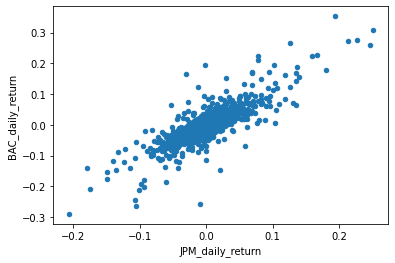

In [58]:
# plot a scatter plot between BAC & JPM
bank_stocks_return.plot(kind = 'scatter', x = 'JPM_daily_return', y = 'BAC_daily_return')

In [59]:
# Fit a polynomial between the selected stock and the JPM (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (JPM) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market.  


beta, alpha = np.polyfit(bank_stocks_return['JPM_daily_return'], bank_stocks_return['BAC_daily_return'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('BAC_daily_return', beta, alpha))  

Beta for BAC_daily_return stock is = 1.0759009117684943 and alpha is = -0.000262469256701445


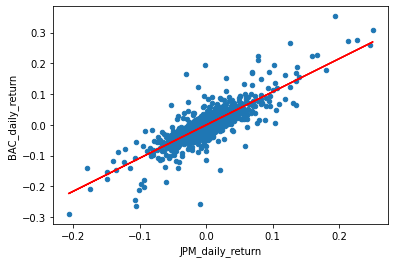

In [60]:
# Now let's plot the scatter plot and the straight line on one plot
bank_stocks_return.plot(kind = 'scatter', x = 'JPM_daily_return', y = 'BAC_daily_return')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(bank_stocks_return['JPM_daily_return'], beta * bank_stocks_return['JPM_daily_return'] + alpha, '-', color = 'r')

# *Apply The CAPM Formula To An Individual Stock*

In [61]:
beta

1.0759009117684943

In [62]:
# Let's calculate the average daily rate of return for JPM
bank_stocks_return['JPM_daily_return'].mean()

0.0005941185214474857

In [63]:
# Let's calculate the annualized rate of return for JPM
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
rm = bank_stocks_return['JPM_daily_return'].mean() * 252
rm

0.1497178674047664

In [64]:
# Assume risk free rate is zero
# Also I can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# Calculate return for any security (BAC_daily_return) using CAPM  
ER_BAC_daily_return = rf + ( beta * (rm-rf) ) 

In [65]:
ER_BAC_daily_return

0.1610815900488227

# *Calculate Beta For All Stocks Returns*

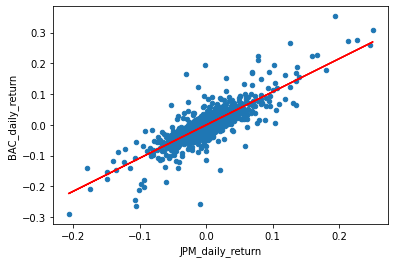

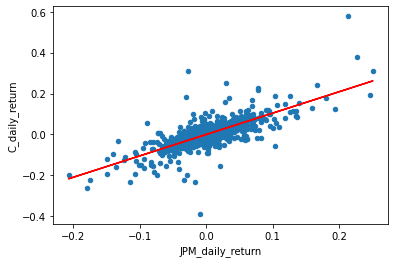

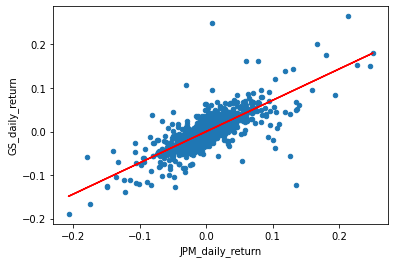

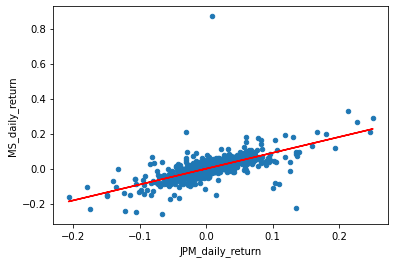

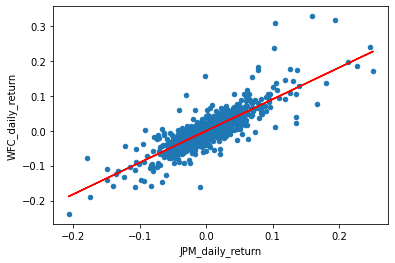

In [66]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in bank_stocks_return.columns:

  # Ignoring the date and JPM Columns 
  if i != 'DATE' and i != 'JPM_daily_return':
    # plot a scatter plot between each individual stock and the JPM (Market)
    bank_stocks_return.plot(kind = 'scatter', x = 'JPM_daily_return', y = i)
    
    # Fit a polynomial between each stock and the JPM (Poly with order = 1 is a straight line)
    b, a = np.polyfit(bank_stocks_return['JPM_daily_return'], bank_stocks_return[i], 1)
    
    plt.plot(bank_stocks_return['JPM_daily_return'], b * bank_stocks_return['JPM_daily_return'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [67]:
# Let's view Beta for every stock 
beta

{'BAC_daily_return': 1.0759009117684943,
 'C_daily_return': 1.0468909672877802,
 'GS_daily_return': 0.7183291083026372,
 'MS_daily_return': 0.9047735455798928,
 'WFC_daily_return': 0.9058280440646841}

In [68]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (JPM)
# Alpha indicates the “excess return” or “abnormal rate of return,” 

alpha

{'BAC_daily_return': -0.000262469256701445,
 'C_daily_return': -0.0006353327469123745,
 'GS_daily_return': -4.367898038067999e-08,
 'MS_daily_return': -1.5375331637873218e-05,
 'WFC_daily_return': -0.00022735656083269665}

# *Apply CAPM Formula To Calculate The Return For The Portfolio*

In [69]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['BAC_daily_return',
 'C_daily_return',
 'GS_daily_return',
 'MS_daily_return',
 'WFC_daily_return']

In [70]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = bank_stocks_return['JPM_daily_return'].mean() * 252 # this is the expected return of the market 
rm

0.1497178674047664

In [71]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [72]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for BAC_daily_return is 0.1610815900488227%
Expected Return Based on CAPM for C_daily_return is 0.1567382830276395%
Expected Return Based on CAPM for GS_daily_return is 0.1075467021898383%
Expected Return Based on CAPM for MS_daily_return is 0.13546076572847074%
Expected Return Based on CAPM for WFC_daily_return is 0.13561864299279527%


In [73]:
# Assume equal weights in the portfolio
portfolio_weights = 1/5 * np.ones(5) 
portfolio_weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [74]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

0.1392891967975133

In [75]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 0.1392891967975133%



In [76]:
# Calculate the expected return for the portfolio assuming we only have 50% allocation in BAC and 50% in WFC

ER['WFC_daily_return']

0.13561864299279527

In [77]:
# Calculate the portfolio return 
ER_portfolio = 0.5 * ER['BAC_daily_return'] +  0.5 * ER['WFC_daily_return']
ER_portfolio

0.14835011652080898